<a href="https://colab.research.google.com/github/mding010705/CSC311-ML-Challenge/blob/main/CSC311_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# GitHub raw file URL
url = "https://raw.githubusercontent.com/mding010705/CSC311-ML-Challenge/main/clean_results_genres.csv"

# Download the CSV file
response = requests.get(url)
if response.status_code == 200:
    with open("clean_results_genres.csv", "wb") as file:
        file.write(response.content)
    print("Download complete.")

    # Read the CSV into a pandas DataFrame
    df = pd.read_csv("clean_results_genres.csv")
    print(df.head())
else:
    print("Failed to download the file. Status code:", response.status_code)

Download complete.
   Unnamed: 0      id  food_complexity  num_ingredients  \
0           0  716549                3              6.0   
1           1  715742                4              2.0   
2           2  727333                3              5.0   
3           3  606874                4              6.5   
4           4  505318                2              3.0   

                                     serving_setting  expected_cost  \
0         Week day lunch,At a party,Late night snack            5.0   
1         Week day lunch,At a party,Late night snack            5.0   
2  Week day lunch,Week day dinner,Weekend lunch,W...           10.0   
3  Week day lunch,Week day dinner,Weekend lunch,W...            3.0   
4  Week day lunch,Week day dinner,Weekend lunch,W...            5.0   

        related_movie paired_drink           associated_people  \
0  cloudywithachanceo    cola,soda                     Friends   
1         allamerican    cola,soda  Friends,Teachers,Strangers   
2

In [16]:
genre_map = {
    "28": "Action",
    "12": "Adventure",
    "16": "Animation",
    "35": "Comedy",
    "80": "Crime",
    "99": "Documentary",
    "18": "Drama",
    "10751": "Family",
    "14": "Fantasy",
    "36": "History",
    "27": "Horror",
    "10402": "Music",
    "9648": "Mystery",
    "10749": "Romance",
    "878": "Science Fiction",
    "10770": "TV Movie",
    "53": "Thriller",
    "10752": "War",
    "37": "Western",
    "10759": "Action & Adventure",
    "10762": "Kids",
    "10763": "News",
    "10764": "Reality",
    "10765": "Sci-Fi & Fantasy",
    "10766": "Soap",
    "10767": "Talk",
    "10768": "War & Politics",
    "Pizza": "Pizza",
    "Shawarma": "Shawarma",
    "Sushi": "Sushi"
}


df['movie_genres'] = df['movie_genres'].apply(lambda x: [genre_map[i] for i in x.split(',')] if pd.notna(x) else np.nan)

In [18]:
df['paired_drink'] = df['paired_drink'].apply(lambda x: x.split(',')[0] if pd.notna(x) else np.nan)

df['paired_drink']

,paired_drink
0,cola
1,cola
2,cola
3,soda
4,soda
...,...
1639,soda
1640,water
1641,water
1642,tea


In [19]:
# Adjust serving setting to several columns
serving_settings = ['Week day lunch','Week day dinner','Weekend lunch','Weekend dinner','At a party','Late night snack']
column_names = {'Week day lunch': 'serving_setting.weekday_lunch','Week day dinner': 'serving_setting.weekday_dinner',
                'Weekend lunch': 'serving_setting.weekend_lunch','Weekend dinner': 'serving_setting.weekend_dinner',
                'At a party': 'serving_setting.party','Late night snack': 'serving_setting.night_snack'}

for idx, row in df.iterrows():
    for serving_setting in serving_settings:
      if serving_setting in row['serving_setting']:
        df.loc[idx, column_names[serving_setting]] = 1
      else:
        df.loc[idx, column_names[serving_setting]] = 0

# Adjust associated people to indicator columns
associated_peoples = ['Parents', 'Siblings', 'Friends', 'Strangers', 'Teachers']
column_names = {'Parents': 'associated_people.parents','Siblings': 'associated_people.siblings',
                'Friends': 'associated_people.friends','Strangers': 'associated_people.stangers',
                'Teachers': 'associated_people.teachers'}

for idx, row in df.iterrows():
    for associated_people in associated_peoples:
      if isinstance(row['associated_people'], str) and associated_people in row['associated_people']:
        df.loc[idx, column_names[associated_people]] = 1
      else:
        df.loc[idx, column_names[associated_people]] = 0

# Drop modified columns
df = df.drop(columns=['serving_setting', 'associated_people'])

In [20]:
df.head()

,Unnamed: 0,id,food_complexity,num_ingredients,expected_cost,related_movie,paired_drink,hot_sauce_level,Label,movie_genres,...,serving_setting.weekday_dinner,serving_setting.weekend_lunch,serving_setting.weekend_dinner,serving_setting.party,serving_setting.night_snack,associated_people.parents,associated_people.siblings,associated_people.friends,associated_people.stangers,associated_people.teachers
0,0,716549,3,6.0,5.0,cloudywithachanceo,cola,A little (mild),Pizza,"[Animation, Comedy, Family]",...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,715742,4,2.0,5.0,allamerican,cola,none,Pizza,[Drama],...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,2,727333,3,5.0,10.0,actionpoint,cola,A moderate amount (medium),Pizza,[Comedy],...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,606874,4,6.5,3.0,mammamia,soda,I will have some of this food item with my hot...,Pizza,"[Comedy, Romance]",...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
4,4,505318,2,3.0,5.0,cloudywithachanceo,soda,A little (mild),Pizza,"[Animation, Comedy, Family]",...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [21]:
df_pizza = df[df['Label'] == 'Pizza']
df_shawarma = df[df['Label'] == 'Shawarma']
df_sushi = df[df['Label'] == 'Sushi']

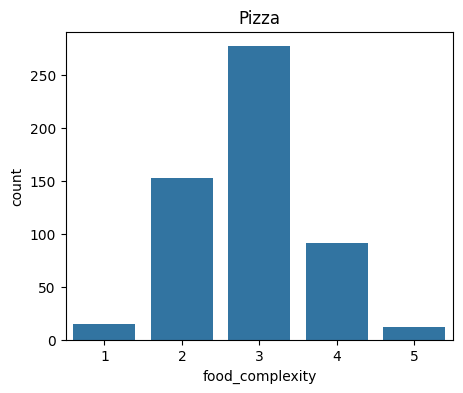

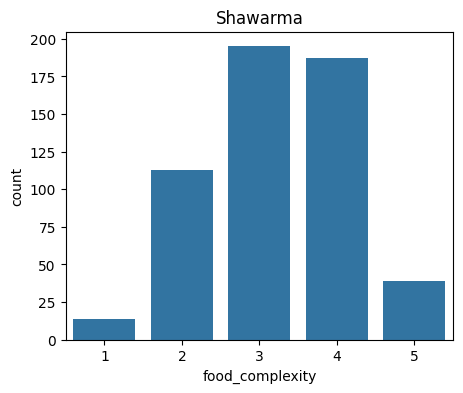

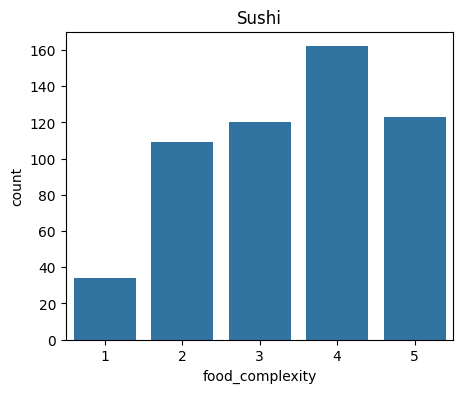

In [22]:
# Create histrogram of food complexity for each label
# First plot
plt.figure(figsize=(5, 4))
sns.countplot(df_pizza, x='food_complexity')
plt.title('Pizza')
plt.show()

# Second plot
plt.figure(figsize=(5, 4))
sns.countplot(df_shawarma, x='food_complexity')
plt.title('Shawarma')
plt.show()

# Third plot
plt.figure(figsize=(5, 4))
sns.countplot(df_sushi, x='food_complexity')
plt.title('Sushi')
plt.show()

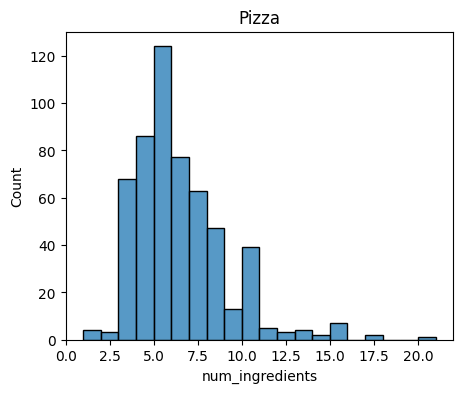

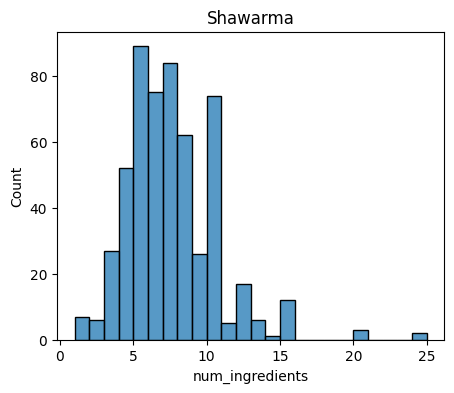

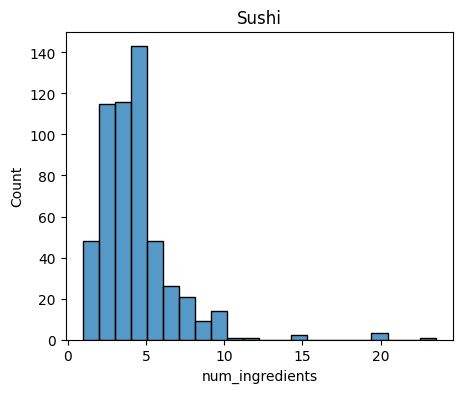

In [23]:
# Create histograms of number of ingredients for each food
# First plot
plt.figure(figsize=(5, 4))
sns.histplot(df_pizza, x='num_ingredients', binwidth=1)
plt.title('Pizza')
plt.show()

# Second plot
plt.figure(figsize=(5, 4))
sns.histplot(df_shawarma, x='num_ingredients', binwidth=1)
plt.title('Shawarma')
plt.show()

# Third plot
plt.figure(figsize=(5, 4))
sns.histplot(df_sushi, x='num_ingredients', binwidth=1)
plt.title('Sushi')
plt.show()

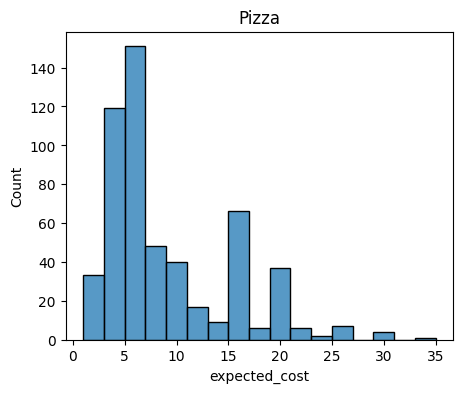

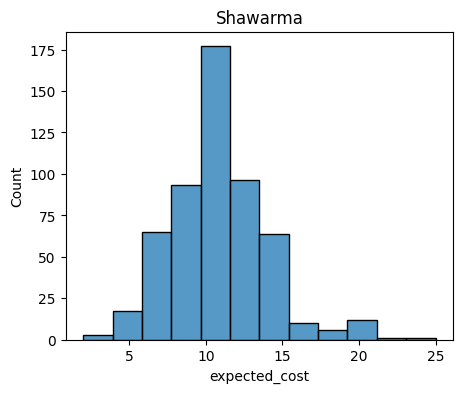

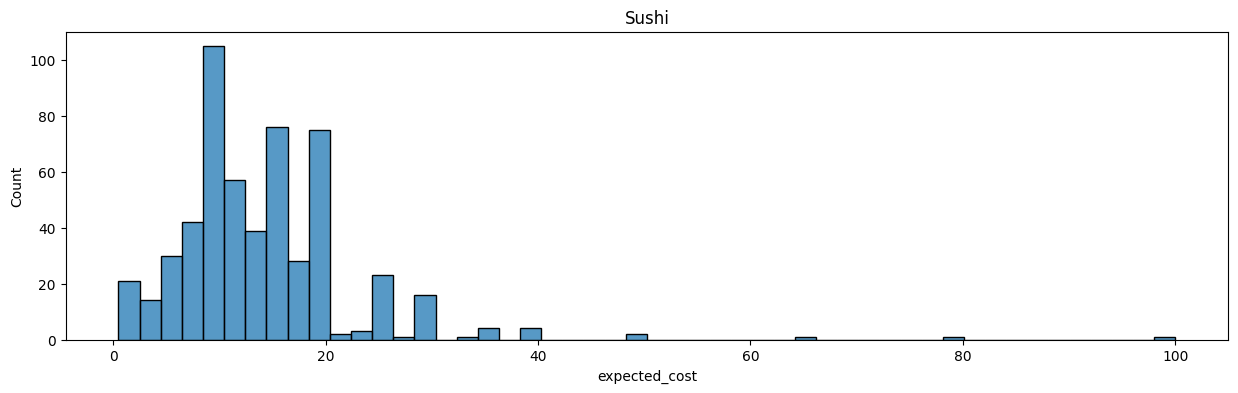

In [24]:
# Create histograms of number of ingredients for each food
# First plot
plt.figure(figsize=(5, 4))
sns.histplot(df_pizza, x='expected_cost', binwidth=2)
plt.title('Pizza')
plt.show()

# Second plot
plt.figure(figsize=(5, 4))
sns.histplot(df_shawarma, x='expected_cost', binwidth=2)
plt.title('Shawarma')
plt.show()

# Third plot
plt.figure(figsize=(15, 4))
sns.histplot(df_sushi, x='expected_cost', binwidth=2)
plt.title('Sushi')
plt.show()

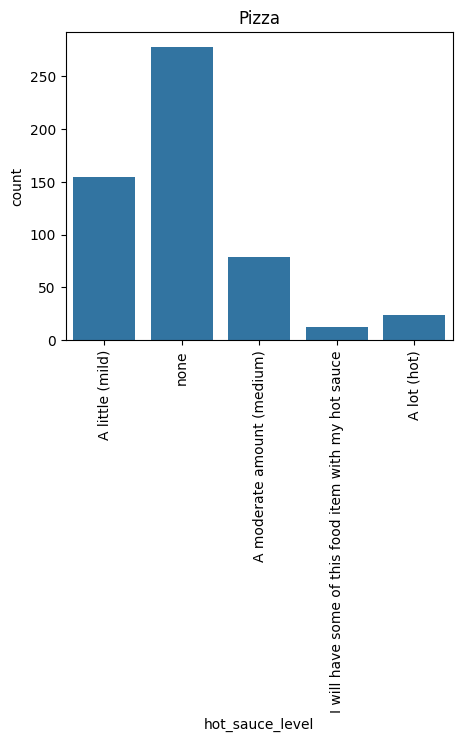

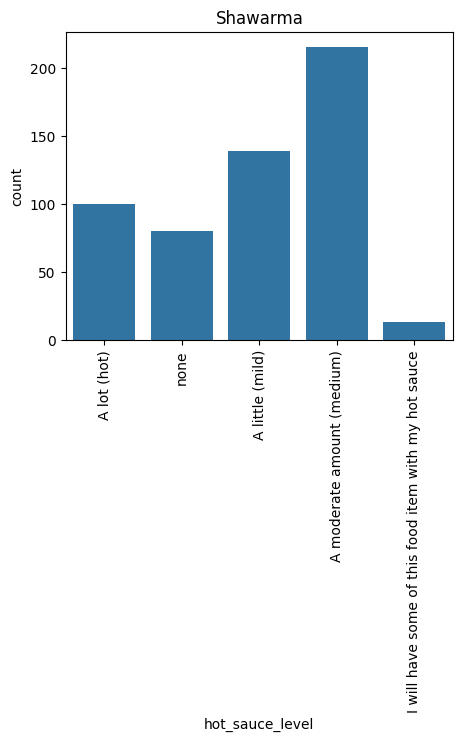

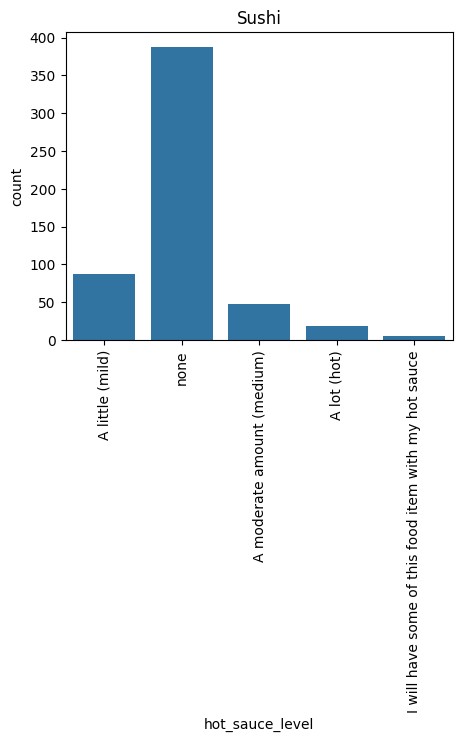

In [28]:
# Create bar plots for hot sauce level
# First plot
plt.figure(figsize=(5, 4))
sns.countplot(df_pizza, x='hot_sauce_level')
plt.xticks(rotation=90)
plt.title('Pizza')
plt.show()

# Second plot
plt.figure(figsize=(5, 4))
sns.countplot(df_shawarma, x='hot_sauce_level')
plt.xticks(rotation=90)
plt.title('Shawarma')
plt.show()

# Third plot
plt.figure(figsize=(5, 4))
sns.countplot(df_sushi, x='hot_sauce_level')
plt.xticks(rotation=90)
plt.title('Sushi')
plt.show()

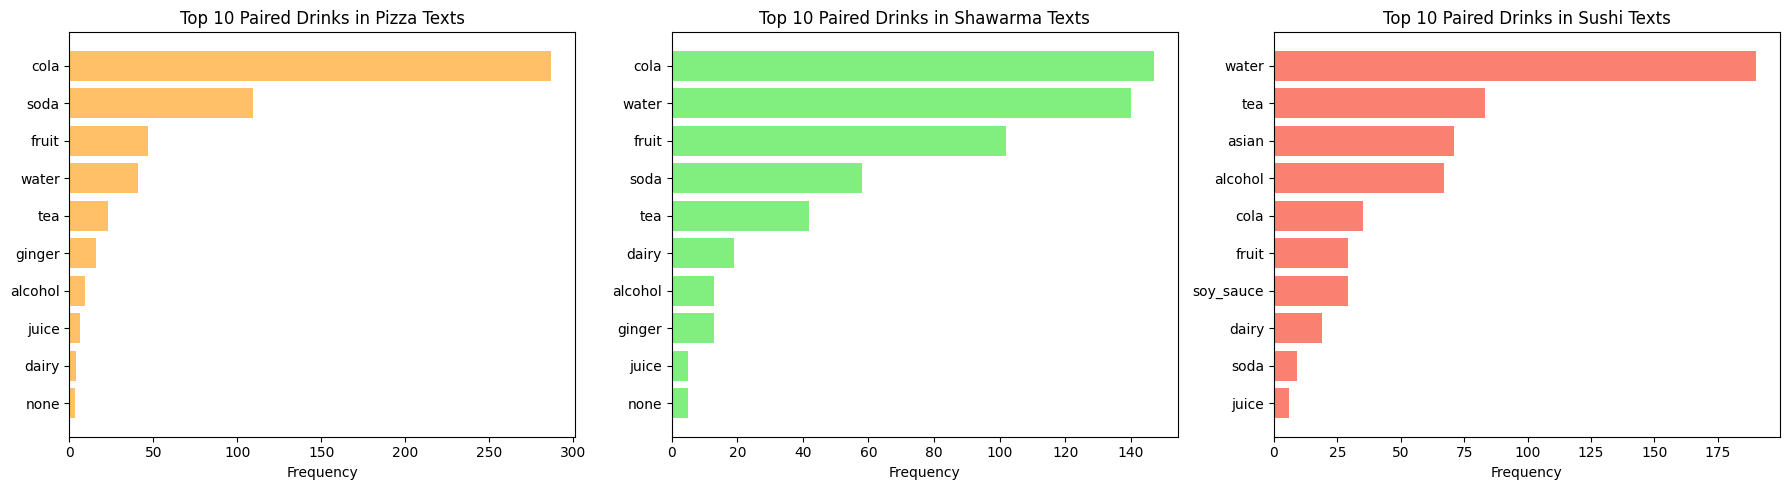

In [50]:
# Top 5 common drinks for each food type

pizza_drinks = df_pizza['paired_drink'].value_counts().head(10)
shawarma_drinks = df_shawarma['paired_drink'].value_counts().head(10)
sushi_drinks = df_sushi['paired_drink'].value_counts().head(10)

# Initialize figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#FFC067', '#80EF80', '#FA8072']

# Plot for Pizza
axes[0].barh(pizza_drinks.index[::-1], pizza_drinks.values[::-1], color=colors[0])
axes[0].set_title("Top 10 Paired Drinks in Pizza Texts")
axes[0].set_xlabel("Frequency")

# Plot for Shawarma
axes[1].barh(shawarma_drinks.index[::-1], shawarma_drinks.values[::-1], color=colors[1])
axes[1].set_title("Top 10 Paired Drinks in Shawarma Texts")
axes[1].set_xlabel("Frequency")

# Plot for Sushi
axes[2].barh(sushi_drinks.index[::-1], sushi_drinks.values[::-1], color=colors[2])
axes[2].set_title("Top 10 Paired Drinks in Sushi Texts")
axes[2].set_xlabel("Frequency")

plt.tight_layout()
plt.show()

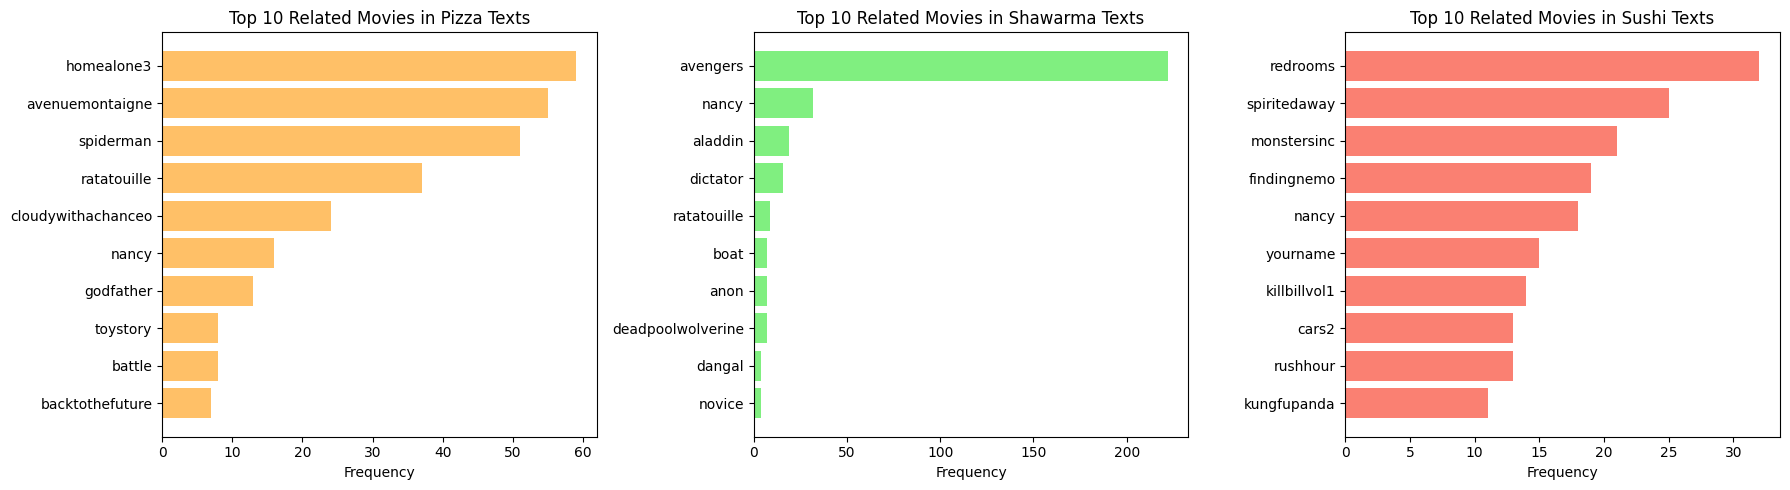

In [49]:
# Top 10 common related movies for each food type

pizza_movies = df_pizza['related_movie'].value_counts().head(10)
shawarma_movies = df_shawarma['related_movie'].value_counts().head(10)
sushi_movies = df_sushi['related_movie'].value_counts().head(10)

# Initialize figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#FFC067', '#80EF80', '#FA8072']

# Plot for Pizza
axes[0].barh(pizza_movies.index[::-1], pizza_movies.values[::-1], color=colors[0])
axes[0].set_title("Top 10 Related Movies in Pizza Texts")
axes[0].set_xlabel("Frequency")

# Plot for Shawarma
axes[1].barh(shawarma_movies.index[::-1], shawarma_movies.values[::-1], color=colors[1])
axes[1].set_title("Top 10 Related Movies in Shawarma Texts")
axes[1].set_xlabel("Frequency")

# Plot for Sushi
axes[2].barh(sushi_movies.index[::-1], sushi_movies.values[::-1], color=colors[2])
axes[2].set_title("Top 10 Related Movies in Sushi Texts")
axes[2].set_xlabel("Frequency")

plt.tight_layout()
plt.show()

In [31]:
# Get summary table of serving setting for each food type

serving_setting_summary = {'Serving Setting': ['Weekday Lunch', 'Weekday Dinner', 'Weekend Lunch', 'Weekend Dinner', 'Party', 'Night Snack'],
                           'Pizza': [df_pizza['serving_setting.weekday_lunch'].sum(), df_pizza['serving_setting.weekday_dinner'].sum(),
                                     df_pizza['serving_setting.weekend_lunch'].sum(), df_pizza['serving_setting.weekend_dinner'].sum(),
                                     df_pizza['serving_setting.party'].sum(), df_pizza['serving_setting.night_snack'].sum()],
                           'Shawarma': [df_shawarma['serving_setting.weekday_lunch'].sum(), df_shawarma['serving_setting.weekday_dinner'].sum(),
                                     df_shawarma['serving_setting.weekend_lunch'].sum(), df_shawarma['serving_setting.weekend_dinner'].sum(),
                                     df_shawarma['serving_setting.party'].sum(), df_shawarma['serving_setting.night_snack'].sum()],
                           'Sushi': [df_sushi['serving_setting.weekday_lunch'].sum(), df_sushi['serving_setting.weekday_dinner'].sum(),
                                     df_sushi['serving_setting.weekend_lunch'].sum(), df_sushi['serving_setting.weekend_dinner'].sum(),
                                     df_sushi['serving_setting.party'].sum(), df_sushi['serving_setting.night_snack'].sum()]}

serving_setting_summary_df = pd.DataFrame(serving_setting_summary)
serving_setting_summary_df = serving_setting_summary_df.set_index('Serving Setting')
serving_setting_summary_df

,Pizza,Shawarma,Sushi
Serving Setting,,,
Weekday Lunch,409.0,507.0,313.0
Weekday Dinner,359.0,317.0,382.0
Weekend Lunch,378.0,389.0,345.0
Weekend Dinner,390.0,236.0,457.0
Party,521.0,89.0,222.0
Night Snack,339.0,178.0,130.0


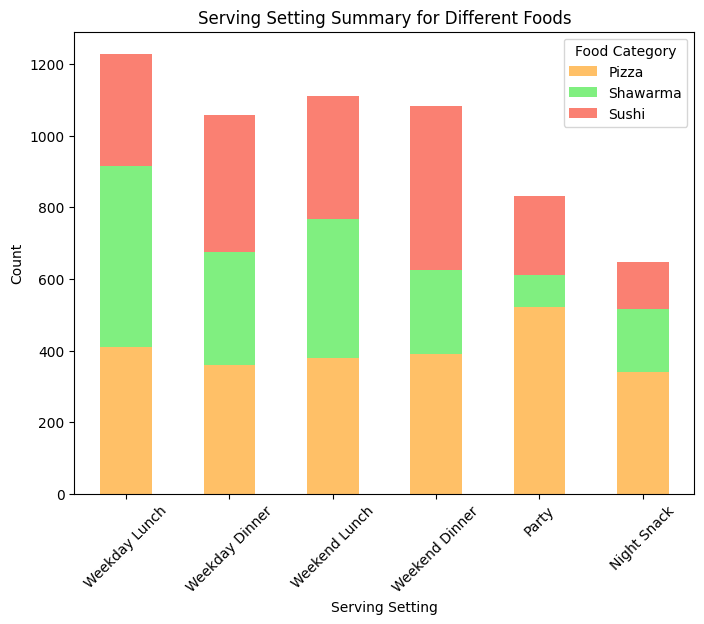

In [32]:
# Create the stacked bar plot
custom_colors = ['#FFC067', '#80EF80', '#FA8072']
serving_setting_summary_df.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

# Add labels and title
plt.xlabel('Serving Setting')
plt.ylabel('Count')
plt.title('Serving Setting Summary for Different Foods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Food Category')

# Show the plot
plt.show()

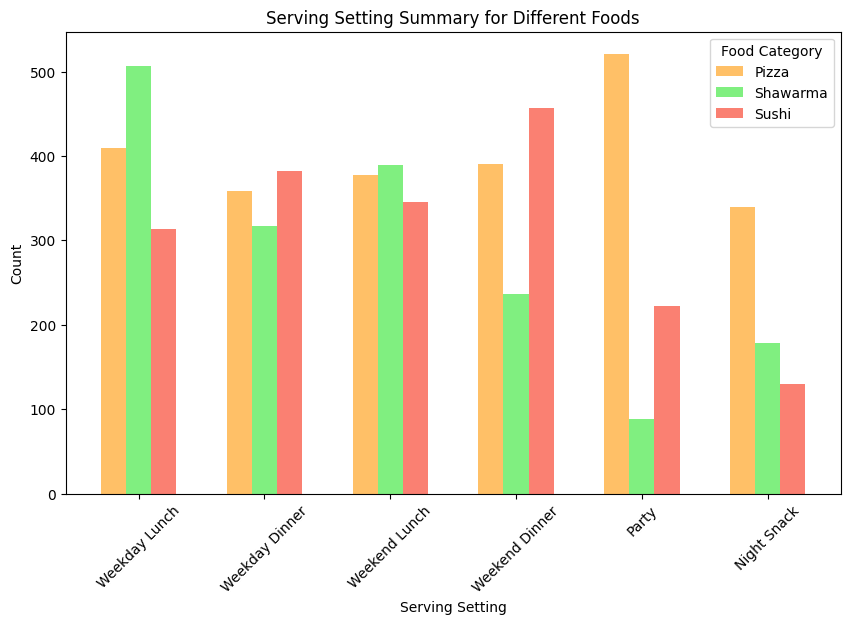

In [33]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Number of categories
categories = serving_setting_summary_df.index
x = np.arange(len(categories))  # X-axis positions for each serving setting
width = 0.2  # Width of each bar

# Plot each food category side by side
ax.bar(x - width, serving_setting_summary_df['Pizza'], width=width, label='Pizza', color='#FFC067')
ax.bar(x, serving_setting_summary_df['Shawarma'], width=width, label='Shawarma', color='#80EF80')
ax.bar(x + width, serving_setting_summary_df['Sushi'], width=width, label='Sushi', color='#FA8072')

# Formatting
ax.set_xlabel('Serving Setting')
ax.set_ylabel('Count')
ax.set_title('Serving Setting Summary for Different Foods')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)  # Rotate x-axis labels for readability
ax.legend(title='Food Category')

# Show the plot
plt.show()

In [34]:
# Get summary table of serving setting for assoiated people

associated_people_summary = {'Associated People': associated_peoples,
                           'Pizza': [df_pizza['associated_people.parents'].sum(), df_pizza['associated_people.siblings'].sum(),
                                     df_pizza['associated_people.friends'].sum(), df_pizza['associated_people.stangers'].sum(),
                                     df_pizza['associated_people.teachers'].sum()],
                           'Shawarma': [df_shawarma['associated_people.parents'].sum(), df_shawarma['associated_people.siblings'].sum(),
                                     df_shawarma['associated_people.friends'].sum(), df_shawarma['associated_people.stangers'].sum(),
                                     df_shawarma['associated_people.teachers'].sum()],
                           'Sushi': [df_sushi['associated_people.parents'].sum(), df_sushi['associated_people.siblings'].sum(),
                                     df_sushi['associated_people.friends'].sum(), df_sushi['associated_people.stangers'].sum(),
                                     df_sushi['associated_people.teachers'].sum()]}

associated_people_summary_df = pd.DataFrame(associated_people_summary)
associated_people_summary_df = associated_people_summary_df.set_index('Associated People')
associated_people_summary_df

,Pizza,Shawarma,Sushi
Associated People,,,
Parents,170.0,138.0,280.0
Siblings,212.0,142.0,211.0
Friends,485.0,382.0,387.0
Strangers,89.0,218.0,127.0
Teachers,158.0,25.0,29.0


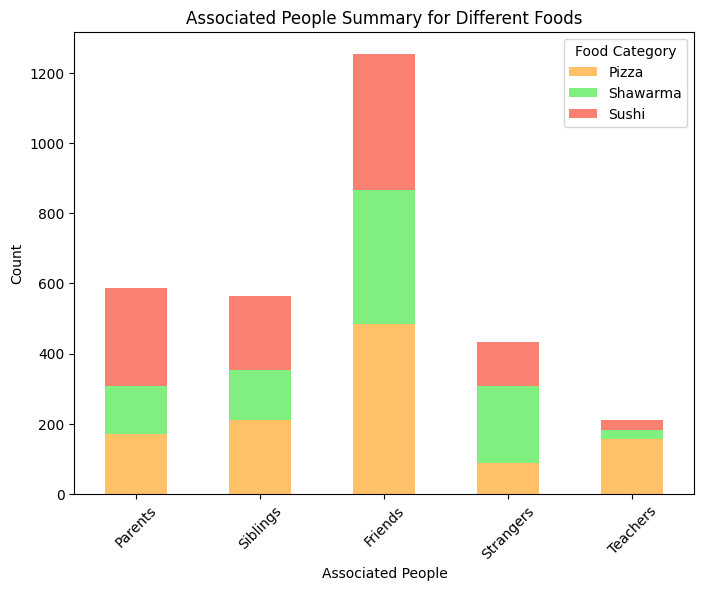

In [35]:
# Create the stacked bar plot
custom_colors = ['#FFC067', '#80EF80', '#FA8072']
associated_people_summary_df.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

# Add labels and title
plt.xlabel('Associated People')
plt.ylabel('Count')
plt.title('Associated People Summary for Different Foods')
plt.xticks(rotation=45)
plt.legend(title='Food Category')

# Show the plot
plt.show()

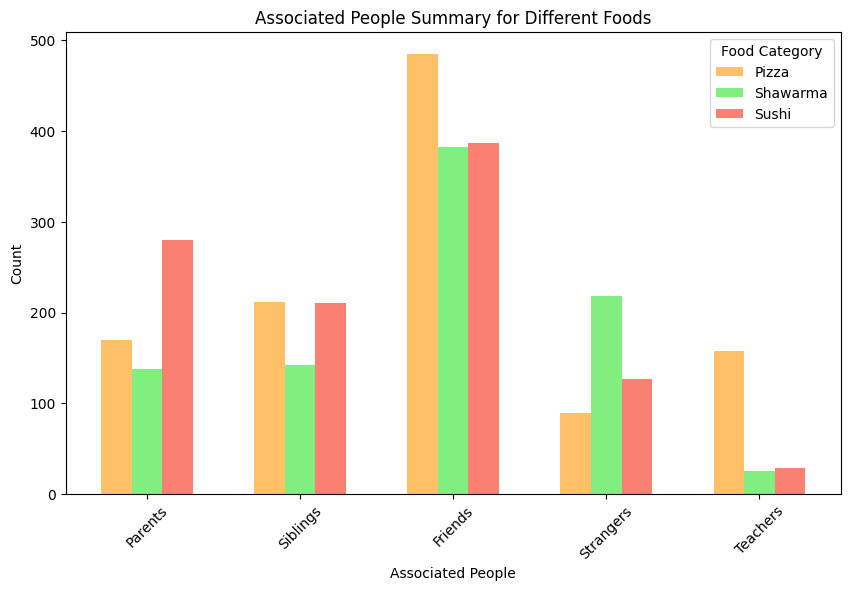

In [36]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Number of categories
categories = associated_people_summary_df.index
x = np.arange(len(categories))  # X-axis positions for each serving setting
width = 0.2  # Width of each bar

# Plot each food category side by side
ax.bar(x - width, associated_people_summary_df['Pizza'], width=width, label='Pizza', color='#FFC067')
ax.bar(x, associated_people_summary_df['Shawarma'], width=width, label='Shawarma', color='#80EF80')
ax.bar(x + width, associated_people_summary_df['Sushi'], width=width, label='Sushi', color='#FA8072')

# Formatting
ax.set_xlabel('Associated People')
ax.set_ylabel('Count')
ax.set_title('Associated People Summary for Different Foods')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)  # Rotate x-axis labels for readability
ax.legend(title='Food Category')

# Show the plot
plt.show()

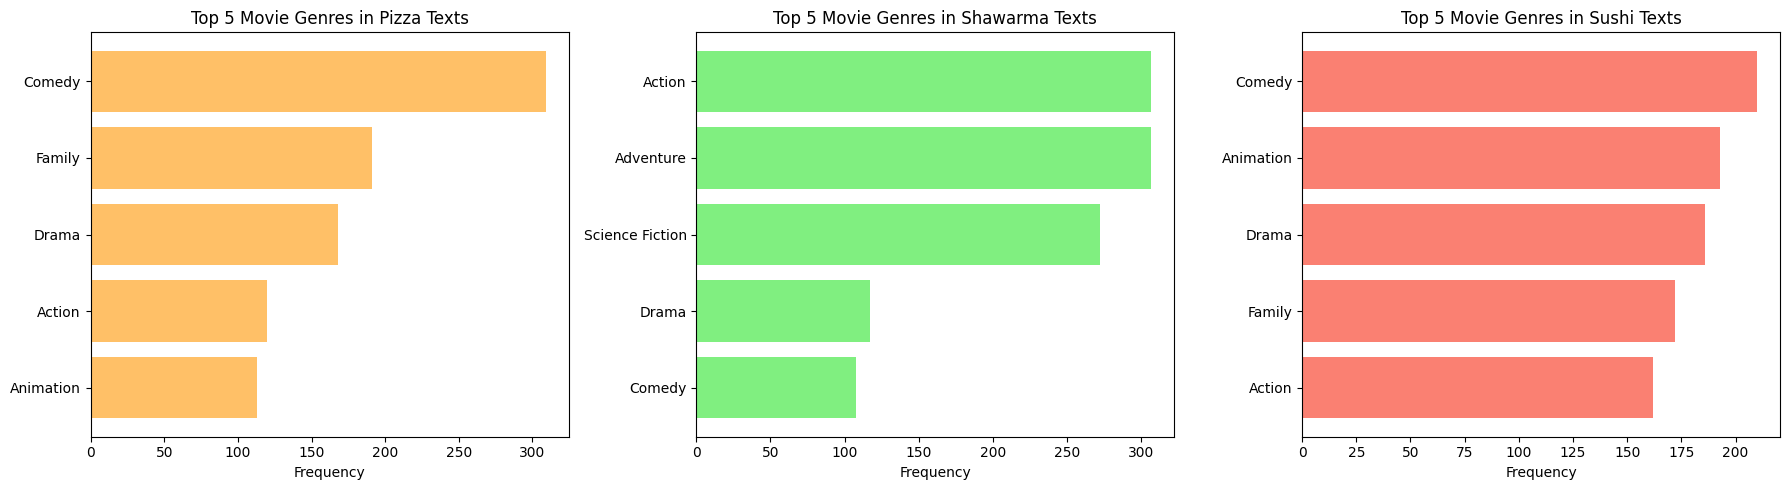

In [48]:
# Show top 5 most common genres for each food category

# Get top 5 most frequent genres for each category
pizza_genres = df_pizza['movie_genres'].explode().value_counts().head(5)
shawarma_genres = df_shawarma['movie_genres'].explode().value_counts().head(5)
sushi_genres = df_sushi['movie_genres'].explode().value_counts().head(5)

# Initialize figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#FFC067', '#80EF80', '#FA8072'] # Colors for each category

# Plot for Pizza
axes[0].barh(pizza_genres.index[::-1], pizza_genres.values[::-1], color=colors[0])
axes[0].set_title("Top 5 Movie Genres in Pizza Texts")
axes[0].set_xlabel("Frequency")

# Plot for Shawarma
axes[1].barh(shawarma_genres.index[::-1], shawarma_genres.values[::-1], color=colors[1])
axes[1].set_title("Top 5 Movie Genres in Shawarma Texts")
axes[1].set_xlabel("Frequency")

# Plot for Sushi
axes[2].barh(sushi_genres.index[::-1], sushi_genres.values[::-1], color=colors[2])
axes[2].set_title("Top 5 Movie Genres in Sushi Texts")
axes[2].set_xlabel("Frequency")

plt.tight_layout()
plt.show()

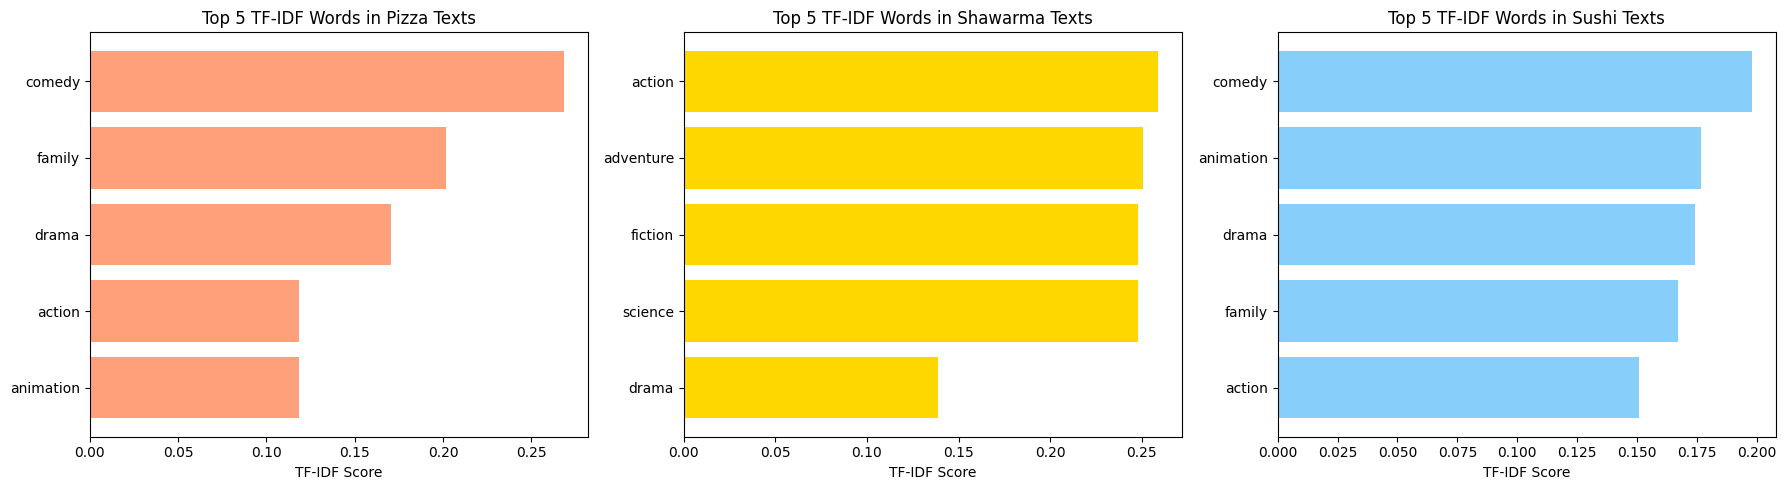

In [46]:
data_frames = {
    "pizza": df_pizza,
    "shawarma": df_shawarma,
    "sushi": df_sushi
}

# Initialize figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#FFA07A', '#FFD700', '#87CEFA']  # Colors for each category

for idx, (category, df) in enumerate(data_frames.items()):
    texts = df["movie_genres"].apply(lambda x: ' '.join(x) if isinstance(x, list) and x else '')

    tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = tfidf.fit_transform(texts)
    feature_names = tfidf.get_feature_names_out()
    tfidf_scores = tfidf_matrix.mean(axis=0).A1

    # Get top 5 words
    top_indices = tfidf_scores.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_scores = [tfidf_scores[i] for i in top_indices]

    # Plot
    axes[idx].barh(top_words[::-1], top_scores[::-1], color=colors[idx])
    axes[idx].set_title(f"Top 5 TF-IDF Words in {category.capitalize()} Texts")
    axes[idx].set_xlabel("TF-IDF Score")

plt.tight_layout()
plt.show()